# Execute the code chunk in sequence,  after few code, there is instruction to skip the following to code chunks to time delay in execution, after skiping those code chunks , resume the execution in sequence

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
url1="https://raw.githubusercontent.com/ZainabMCheema/Exploratory-Data-Analysis/main/Human%20Activity%20Classifiction%20Dataset/Updated_feature_meta.csv"
url_2="https://raw.githubusercontent.com/ZainabMCheema/Exploratory-Data-Analysis/main/Human%20Activity%20Classifiction%20Dataset/Updated_feature_test.csv"
url_3="https://raw.githubusercontent.com/ZainabMCheema/Exploratory-Data-Analysis/main/Human%20Activity%20Classifiction%20Dataset/Updated_feature_kaggle.csv"
df_meta=pd.read_csv(url1)
df_test=pd.read_csv(url_2)
df_kaggle=pd.read_csv(url_3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


#file_path3='/content/drive/My Drive/Course Dataset/Updated_feature_meta.csv' #k
#file_path4='/content/drive/My Drive/Course Dataset/Updated_feature_test.csv'
#file_path5='/content/drive/My Drive/Course Dataset/Updated_feature_kaggle.csv'


#file_path3='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/Updated_feature_meta.csv' #zainab's
#file_path4='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/Updated_feature_test.csv' #zainab's
#file_path5='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/Updated_feature_kaggle.csv' #zainab's

#df_meta=pd.read_csv(file_path3)
#df_test=pd.read_csv(file_path4)
#df_kaggle=pd.read_csv(file_path5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_meta.shape

(6310, 61)

In [5]:
# Reorder columns in df_test
df_test = df_test.reindex(columns=df_meta.columns)

# Reorder columns in df_kaggle
df_kaggle = df_kaggle.reindex(columns=df_meta.columns)

In [6]:
# Extract features and target
X = df_meta.drop(columns=['activity', 'user_snippet',  'entropy_x', 'entropy_y', 'entropy_z'])  # Features (excluding 'activity' and 'user_snippet')
y = df_meta['activity']
X_test_df = df_test.drop(columns=['activity', 'user_snippet', 'entropy_x', 'entropy_y', 'entropy_z'])
y_test_df = df_test['activity']
X_kaggle = df_kaggle.drop(columns=['user_snippet', 'activity' , 'entropy_x', 'entropy_y', 'entropy_z'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.head()

,total_power_x,total_power_y,total_power_z,thd_x,thd_y,thd_z,iqr_x,iqr_y,iqr_z,kurtosis_x,...,energy_x,energy_y,energy_z,resultant_magnitude_x,resultant_magnitude_y,resultant_magnitude_z,dominant_frequency,spectral_entropy,spectral_centroid,psd_mean
1593,30049.094802,71674.481269,74221.328608,0.251244,0.223961,0.296568,3.2575,6.5125,5.090605,0.377784,...,8.92,2.49,4.562817,8.92,2.49,4.562817,0.0,-30.784783,0.623713,6.459685
5710,8893.432399,18700.527950,10632.240111,0.613494,0.157327,1.128614,1.9775,3.9800,2.046457,0.384160,...,3.76,12.26,4.520000,3.76,12.26,4.520000,1.0,-50.915059,1.074753,105.590167
613,107391.671069,81794.797649,57761.282658,0.372678,0.374807,0.356214,6.9800,4.2150,3.690000,-0.748386,...,3.49,8.69,1.457377,3.49,8.69,1.457377,0.0,-30.605510,0.931667,38.616133
1954,137250.823632,353879.145117,54183.946933,0.360829,0.049673,0.270177,5.8550,14.0475,5.059959,0.631956,...,1.14,3.15,2.720000,1.14,3.15,2.720000,1.0,-8.284447,1.405183,13.227342
4693,82693.253297,68455.816968,54106.725494,0.075376,0.068841,0.888986,5.3950,7.2150,6.770000,1.146298,...,10.31,2.26,0.803601,10.31,2.26,0.803601,0.0,-35.293932,0.855185,13.638211


In [9]:
X_train.corr()

,total_power_x,total_power_y,total_power_z,thd_x,thd_y,thd_z,iqr_x,iqr_y,iqr_z,kurtosis_x,...,energy_x,energy_y,energy_z,resultant_magnitude_x,resultant_magnitude_y,resultant_magnitude_z,dominant_frequency,spectral_entropy,spectral_centroid,psd_mean
total_power_x,1.000000,0.620231,0.635116,0.049112,0.369272,0.033201,0.892730,0.622116,0.575312,-0.297294,...,-0.023433,0.004997,-0.007416,-0.023433,0.004997,-0.007416,-0.035370,0.004160,-0.042257,-0.013294
total_power_y,0.620231,1.000000,0.749889,0.057735,0.266382,0.005173,0.631339,0.932547,0.774805,-0.251417,...,0.021138,-0.000286,0.007741,0.021138,-0.000286,0.007741,-0.051545,-0.001828,-0.063785,-0.011497
total_power_z,0.635116,0.749889,1.000000,0.023960,0.266742,-0.061467,0.596724,0.691732,0.909393,-0.240746,...,0.041395,-0.013522,0.008215,0.041395,-0.013522,0.008215,-0.052012,-0.000971,-0.070927,-0.008903
thd_x,0.049112,0.057735,0.023960,1.000000,0.337683,0.435859,0.075971,0.108787,0.087915,0.002028,...,-0.007007,-0.012580,0.025435,-0.007007,-0.012580,0.025435,-0.013153,0.005573,-0.011551,0.004913
thd_y,0.369272,0.266382,0.266742,0.337683,1.000000,0.348131,0.456132,0.332680,0.318642,-0.150401,...,-0.019040,-0.006751,-0.001362,-0.019040,-0.006751,-0.001362,-0.023127,0.007963,-0.018933,0.001727
thd_z,0.033201,0.005173,-0.061467,0.435859,0.348131,1.000000,0.085471,0.049631,0.035639,0.071455,...,-0.009730,0.009922,-0.000428,-0.009730,0.009922,-0.000428,-0.004137,-0.004163,-0.007700,0.014399
iqr_x,0.892730,0.631339,0.596724,0.075971,0.456132,0.085471,1.000000,0.674329,0.597959,-0.406398,...,-0.028609,0.010776,-0.008195,-0.028609,0.010776,-0.008195,-0.019756,0.003845,-0.026024,-0.001390
iqr_y,0.622116,0.932547,0.691732,0.108787,0.332680,0.049631,0.674329,1.000000,0.753003,-0.301116,...,0.020262,-0.007584,-0.002090,0.020262,-0.007584,-0.002090,-0.049421,0.005017,-0.061192,-0.019744
iqr_z,0.575312,0.774805,0.909393,0.087915,0.318642,0.035639,0.597959,0.753003,1.000000,-0.273237,...,0.060240,-0.013854,0.001552,0.060240,-0.013854,0.001552,-0.053224,-0.005925,-0.070858,-0.010694
kurtosis_x,-0.297294,-0.251417,-0.240746,0.002028,-0.150401,0.071455,-0.406398,-0.301116,-0.273237,1.000000,...,0.035849,-0.014977,-0.008952,0.035849,-0.014977,-0.008952,-0.020323,0.005638,-0.029636,-0.013500


In [11]:
# Feature scaling using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
X_test_df_scaled = scaler.transform(X_test_df)
X_kaggle_scaled = scaler.transform(X_kaggle)

In [12]:
X_test_df_scaled .shape

(1934, 56)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [14]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier( random_state=123, class_weight='balanced')

In [15]:
# Train the Random Forest classifier
rf_classifier.fit(X_train_scaled , y_train)

RandomForestClassifier(class_weight='balanced', random_state=123)

In [16]:
# Initialize selected features to include all features
selected_features = list(range(X_train_scaled.shape[1]))

In [17]:
# Initial performance evaluation
initial_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test_scaled))
print("Initial Accuracy:", initial_accuracy)

Initial Accuracy: 0.9461172741679873


# **Skip the  Following two code chunks it will take long to complete its execution **

In [ ]:
# Initialize selected_features with all features
selected_features = list(range(X_train_scaled.shape[1]))                              # it take long to run, you can intruput the execution  after 1 mint , it worked for coming code chunk.

# Perform backward feature selection
while len(selected_features) > 1:
    # Track the best feature set and its performance
    best_feature_set = selected_features[:]
    best_accuracy = initial_accuracy

    # Iterate over each feature and evaluate its removal
    for feature_idx in selected_features:
        # Copy the feature set and remove the current feature
        reduced_feature_set = selected_features[:]
        reduced_feature_set.remove(feature_idx)

        # Train the Random Forest classifier with reduced feature set
        rf_classifier.fit(X_train_scaled[:, reduced_feature_set], y_train)

        # Evaluate performance on test set
        accuracy = accuracy_score(y_test, rf_classifier.predict(X_test_scaled[:, reduced_feature_set]))

        # Update the best feature set if the performance improves
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature_set = reduced_feature_set[:]

    # Update the selected features with the best feature set
    selected_features = best_feature_set[:]

    # Print the selected features and corresponding accuracy
    print("Selected Features:", selected_features)
    print("Test Accuracy:", best_accuracy)

# Final selected features
print("Final Selected Features:", selected_features)



In [ ]:
selected_features = list(range(X_train_scaled.shape[1]))
feature_names = X_train.columns

# Extract names of selected features
selected_feature_names = [feature_names[i] for i in selected_features]

# Print the names of selected features
print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: ['total_power_x', 'total_power_y', 'total_power_z', 'thd_x', 'thd_y', 'thd_z', 'iqr_x', 'iqr_y', 'iqr_z', 'kurtosis_x', 'kurtosis_y', 'kurtosis_z', 'skewness_x', 'skewness_y', 'skewness_z', 'x-axis__sum_values', 'x-axis__median', 'x-axis__mean', 'x-axis__length', 'x-axis__standard_deviation', 'x-axis__variance', 'x-axis__root_mean_square', 'x-axis__maximum', 'x-axis__absolute_maximum', 'x-axis__minimum', 'y-axis__sum_values', 'y-axis__median', 'y-axis__mean', 'y-axis__length', 'y-axis__standard_deviation', 'y-axis__variance', 'y-axis__root_mean_square', 'y-axis__maximum', 'y-axis__absolute_maximum', 'y-axis__minimum', 'z-axis__sum_values', 'z-axis__median', 'z-axis__mean', 'z-axis__length', 'z-axis__standard_deviation', 'z-axis__variance', 'z-axis__root_mean_square', 'z-axis__maximum', 'z-axis__absolute_maximum', 'z-axis__minimum', 'resultant_direction', 'energy_x', 'energy_y', 'energy_z', 'resultant_magnitude_x', 'resultant_magnitude_y', 'resultant_magnitude_z'

## **Resum the Code execution from the following code chunk**

In [18]:
# Extract selected features
selected_features = [0, 1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 25, 27, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 45, 46, 48, 50, 51, 55]
# Extract selected features from X_train_scaled, X_val_scaled, and X_test_scaled
X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

In [19]:
# Train the Random Forest classifier with selected features
rf_classifier_selected = RandomForestClassifier(random_state=123, class_weight='balanced')
rf_classifier_selected.fit(X_train_selected, y_train)

RandomForestClassifier(class_weight='balanced', random_state=123)

In [20]:
# Evaluate performance on test set
test_accuracy = rf_classifier_selected.score(X_test_selected, y_test)  # validation
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.9587955625990491


In [ ]:
X_test_df_selected = X_test_df_scaled[:, selected_features]    #update the test data based on selected fetures
X_test_df_selected.shape

(1934, 39)

In [ ]:
y_test_df_pred = rf_classifier_selected.predict(X_test_df_selected)
# Evaluate performance on test set
test_accuracy = rf_classifier_selected.score(X_test_df_selected, y_test_df)  # validation
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.843846949327818


In [ ]:

from tabulate import tabulate
class_report_str = classification_report(y_test_df, y_test_df_pred)

# Convert the classification report string to a list of lines
class_report_lines = class_report_str.split('\n')

# Remove empty lines and headers
class_report_lines = [line.split() for line in class_report_lines if line.strip() and line.strip() != 'precision']

# Print the classification report table
headers = class_report_lines[0]
data = class_report_lines[1:]

print("Classification Report of Random Forest with Backward Feature Selection")
print(tabulate(data, headers=headers, tablefmt='grid'))


Classification Report of Random Forest with Backward Feature Selection
+------------+-------------+----------+------------+-----------+
|            | precision   |   recall |   f1-score |   support |
+============+=============+==========+============+===========+
| Downstairs | 0.65        |     0.3  |       0.41 |    174    |
+------------+-------------+----------+------------+-----------+
| Jogging    | 0.95        |     0.98 |       0.96 |    689    |
+------------+-------------+----------+------------+-----------+
| Sitting    | 0.61        |     1    |       0.76 |     22    |
+------------+-------------+----------+------------+-----------+
| Standing   | 1.00        |     0.67 |       0.81 |     43    |
+------------+-------------+----------+------------+-----------+
| Upstairs   | 0.74        |     0.47 |       0.57 |    238    |
+------------+-------------+----------+------------+-----------+
| Walking    | 0.80        |     0.97 |       0.88 |    768    |
+------------+-----

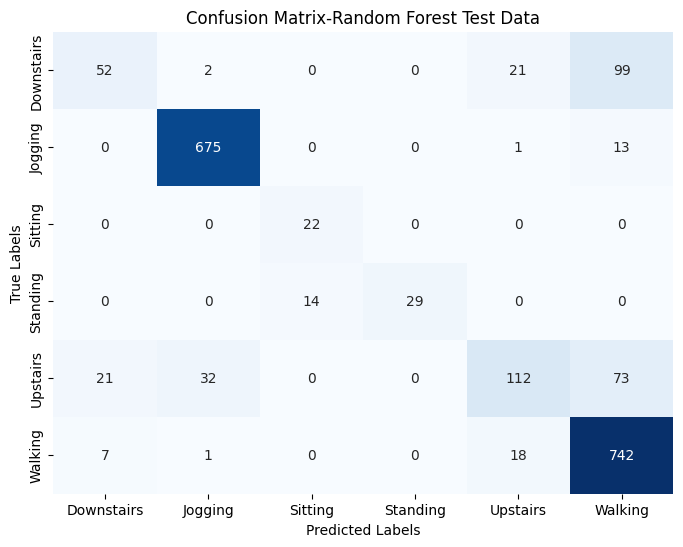

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Get unique labels
labels = sorted(y_test_df.unique())

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_df, y_test_df_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix-Random Forest Test Data")
plt.show()

In [ ]:
X_kaggle_selected =X_kaggle_scaled[:, selected_features]



In [ ]:
X_kaggle_selected.shape

(2506, 39)

In [ ]:
#Make predictions on the Kaggle test data
predictions_kaggle = rf_classifier_selected.predict(X_kaggle_selected)


In [ ]:
# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX3.csv'
#predictions_file_path = '/content/drive/My Drive/Course Dataset/SANDBOX3.csv'
# Save predictions for the Kaggle data to a CSV file
df_kaggle['prediction'] = predictions_kaggle
df_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX3.csv


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
rf_classifier = RandomForestClassifier(random_state=123)
param_grid = {
    'n_estimators': [ 40, 60, 70 ],
    'max_depth': [ 16],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [3, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [18], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [2, 3],
                         'n_estimators': [40, 60, 70]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params


{'max_depth': 18,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 60}

In [ ]:
# Create a new RandomForestClassifier with the best parameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
# Fit the model with the best parameters to the data
best_rf_classifier.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=18, min_samples_leaf=3, n_estimators=60,
                       random_state=42)

In [ ]:
# Evaluate the model
accuracy = best_rf_classifier.score(X_test_selected, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9421553090332805


In [ ]:
# Predictions on the unseen data
y_pred_test_bestrf = best_rf_classifier.predict(X_test_df_selected)

# Accuracy
accuracy = accuracy_score(y_test_df,y_pred_test_bestrf)
print("Accuracy:", accuracy)

Accuracy: 0.843329886246122


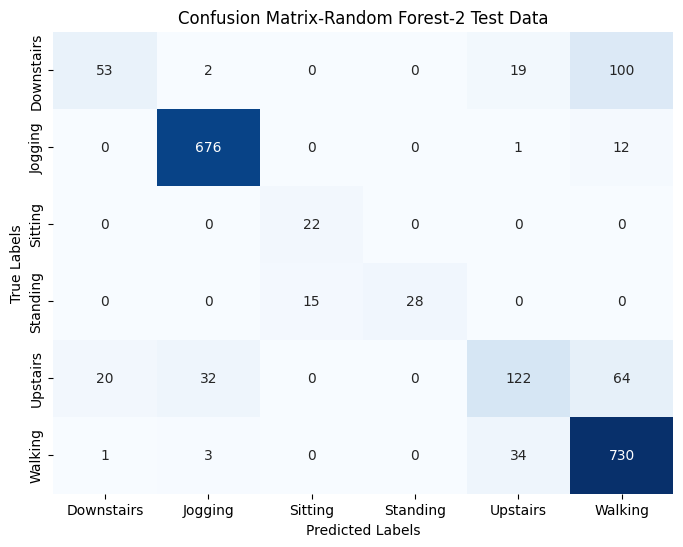

In [ ]:

# Get unique labels
labels = sorted(y_test_df.unique())

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_df, y_pred_test_bestrf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix-Random Forest-2 Test Data")
plt.show()

In [ ]:
predictions_updated=best_rf_classifier.predict(X_kaggle_selected)
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX4.csv'
# Save predictions for the Kaggle data to a CSV file
df_kaggle['prediction'] = predictions_updated
df_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX4.csv


In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

In [ ]:
# Define input shape
input_shape = X_train_selected.shape[1:]

# Define number of classes X_train_selected, y_train
num_classes = 6
input_shape

(39,)

In [ ]:
# Define CNN Architecture
model = models.Sequential([
    layers.Reshape((X_train_selected.shape[1], 1), input_shape=(X_train_selected.shape[1],)),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numerical labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_test_df_encoded = label_encoder.transform(y_test_df)

In [ ]:
#  Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history_cnn=model.fit(X_train_selected, y_train_encoded, validation_data=(X_test_selected, y_test_encoded),  epochs=60, batch_size=32)

Epoch 1/60
158/158 [==============================] - 3s 11ms/step - loss: 0.1667 - accuracy: 0.9293 - val_loss: 0.2444 - val_accuracy: 0.9429
Epoch 2/60
158/158 [==============================] - 2s 10ms/step - loss: 0.1597 - accuracy: 0.9317 - val_loss: 0.2074 - val_accuracy: 0.9469
Epoch 3/60
158/158 [==============================] - 2s 11ms/step - loss: 0.1635 - accuracy: 0.9261 - val_loss: 0.2111 - val_accuracy: 0.9414
Epoch 4/60
158/158 [==============================] - 1s 7ms/step - loss: 0.1613 - accuracy: 0.9255 - val_loss: 0.2301 - val_accuracy: 0.9342
Epoch 5/60
158/158 [==============================] - 1s 6ms/step - loss: 0.1669 - accuracy: 0.9289 - val_loss: 0.2381 - val_accuracy: 0.9382
Epoch 6/60
158/158 [==============================] - 1s 5ms/step - loss: 0.1580 - accuracy: 0.9291 - val_loss: 0.2194 - val_accuracy: 0.9445
Epoch 7/60
158/158 [==============================] - 1s 5ms/step - loss: 0.1572 - accuracy: 0.9289 - val_loss: 0.2239 - val_accuracy: 0.9414
Epo

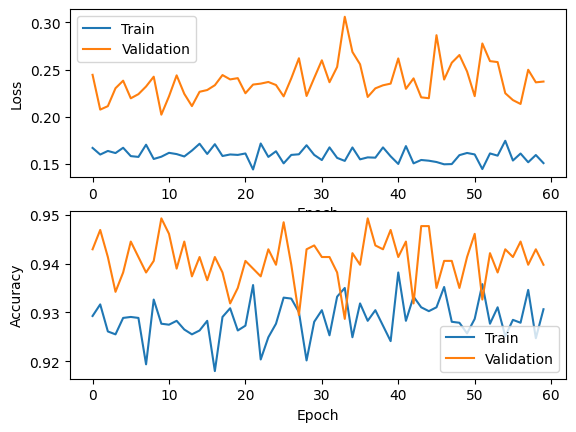

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history_cnn):
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(history_cnn.history['loss'])
    plt.plot(history_cnn.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.subplot(2, 1, 2)
    plt.plot(history_cnn.history['accuracy'])
    plt.plot(history_cnn.history['val_accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

plot_history(history_cnn)


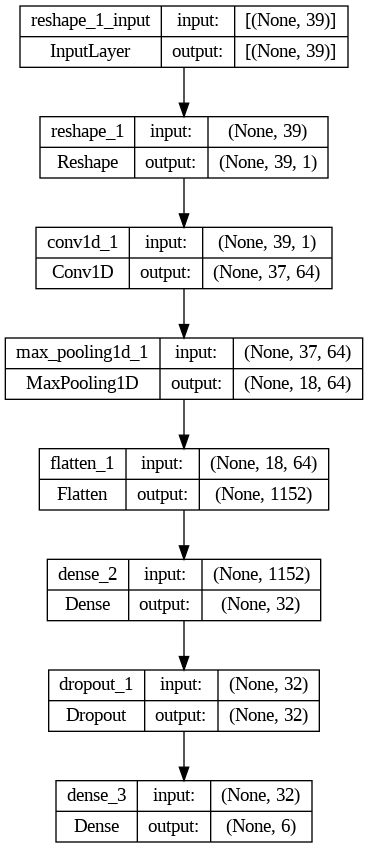

In [ ]:
from keras.utils import plot_model

# Plot the architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True,)

In [ ]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_test_df_selected, y_test_df_encoded)

# Print the evaluation results
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

61/61 [==============================] - 0s 2ms/step - loss: 1.2722 - accuracy: 0.8506
Validation Loss: 1.2721797227859497
Validation Accuracy: 0.8505687713623047


61/61 [==============================] - 0s 4ms/step


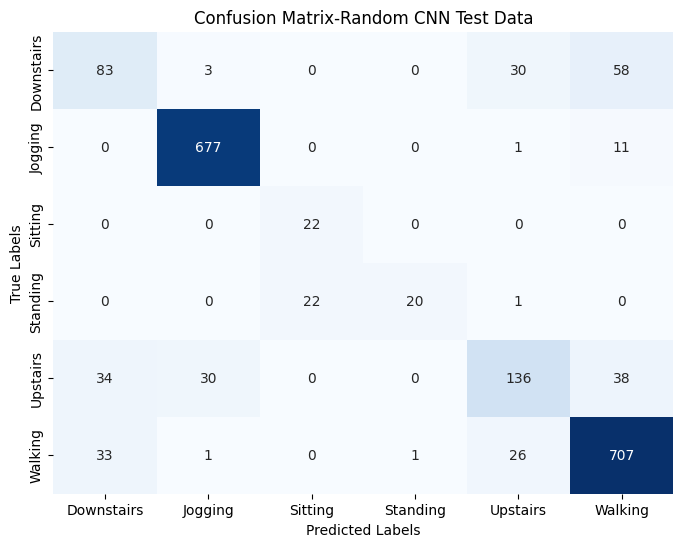

In [ ]:
labels = sorted(y_test_df.unique())
y_pred_cnn = np.argmax(model.predict(X_test_df_selected), axis=1)
# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_df_encoded, y_pred_cnn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix-Random CNN Test Data")
plt.show()

In [ ]:
predictions = model.predict(X_kaggle_selected)

# Print the predictions
print(predictions)

79/79 [==============================] - 0s 2ms/step
[[8.3229773e-02 2.9921489e-11 3.4539729e-23 4.2056724e-19 8.3997864e-03
  9.0837038e-01]
 [0.0000000e+00 0.0000000e+00 9.9999994e-01 8.2448474e-30 1.9715835e-22
  0.0000000e+00]
 [2.5164002e-01 6.1234125e-08 6.7836334e-17 2.8528475e-16 7.3632872e-01
  1.2031148e-02]
 ...
 [0.0000000e+00 9.9999994e-01 0.0000000e+00 0.0000000e+00 2.7515354e-19
  7.8525986e-37]
 [1.2688035e-07 9.4856787e-04 2.4732285e-18 2.1191003e-13 5.0920561e-09
  9.9905127e-01]
 [4.6621001e-01 4.0725688e-04 1.5560091e-09 6.1231309e-09 2.5410765e-01
  2.7927506e-01]]


In [ ]:
predicted_labels_encoded = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

# Print the predicted class labels
print(predicted_labels)

['Walking' 'Sitting' 'Upstairs' ... 'Jogging' 'Walking' 'Downstairs']


In [ ]:
# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX7.csv' #zainab
#predictions_file_path = '/content/drive/My Drive/Course Dataset/predictions_sandbox.csv'
# Save predictions for the Kaggle data to a CSV file
df_kaggle['prediction'] = predicted_labels
df_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX7.csv


In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Define CNN Architecture with L2 Regularization and Early Stopping
model_2 = models.Sequential([
    layers.Reshape((X_train_selected.shape[1], 1), input_shape=(X_test_selected.shape[1],)),
    layers.Conv1D(62, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
   # layers.Conv1D(32, kernel_size=3, activation='relu'),
   # layers.MaxPooling1D(pool_size=2),
   # layers.Conv1D(16, kernel_size=3, activation='relu'),
   # layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])


model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

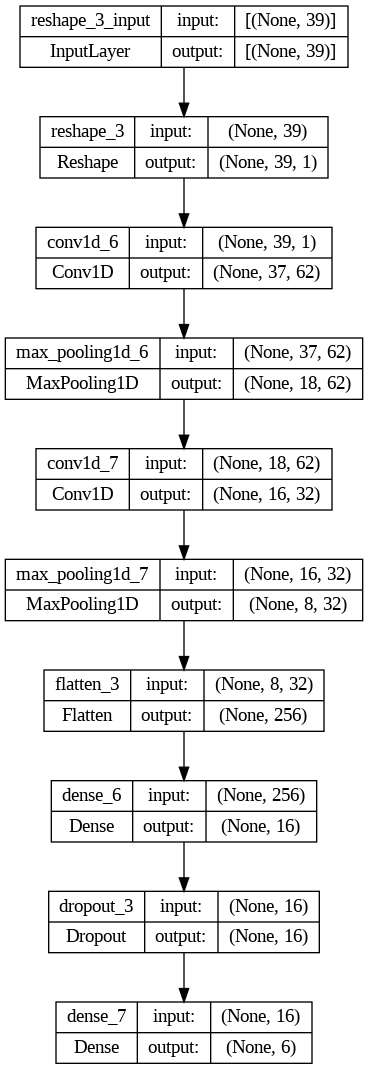

In [ ]:
from keras.utils import plot_model

# Plot the architecture
plot_model(model_2, to_file='model_architecture.png', show_shapes=True, show_layer_names=True,)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Train the model with Early Stopping
history = model_2.fit(X_train_selected, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_test_selected, y_test_encoded), callbacks=[early_stopping])

Epoch 1/100
158/158 [==============================] - 5s 9ms/step - loss: 1.3732 - accuracy: 0.6450 - val_loss: 0.8487 - val_accuracy: 0.7868
Epoch 2/100
158/158 [==============================] - 1s 7ms/step - loss: 0.8256 - accuracy: 0.7760 - val_loss: 0.6633 - val_accuracy: 0.8067
Epoch 3/100
158/158 [==============================] - 1s 7ms/step - loss: 0.6940 - accuracy: 0.8025 - val_loss: 0.5718 - val_accuracy: 0.8415
Epoch 4/100
158/158 [==============================] - 1s 7ms/step - loss: 0.6143 - accuracy: 0.8239 - val_loss: 0.5140 - val_accuracy: 0.8558
Epoch 5/100
158/158 [==============================] - 1s 7ms/step - loss: 0.5596 - accuracy: 0.8397 - val_loss: 0.4733 - val_accuracy: 0.8629
Epoch 6/100
158/158 [==============================] - 1s 7ms/step - loss: 0.5229 - accuracy: 0.8496 - val_loss: 0.4446 - val_accuracy: 0.8708
Epoch 7/100
158/158 [==============================] - 1s 7ms/step - loss: 0.4906 - accuracy: 0.8570 - val_loss: 0.4253 - val_accuracy: 0.8693

In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 39, 1)             0         
                                                                 
 conv1d_8 (Conv1D)           (None, 37, 62)            248       
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 18, 62)            0         
 g1D)                                                            
                                                                 
 conv1d_9 (Conv1D)           (None, 16, 32)            5984      
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 8, 32)             0         
 g1D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 256)              

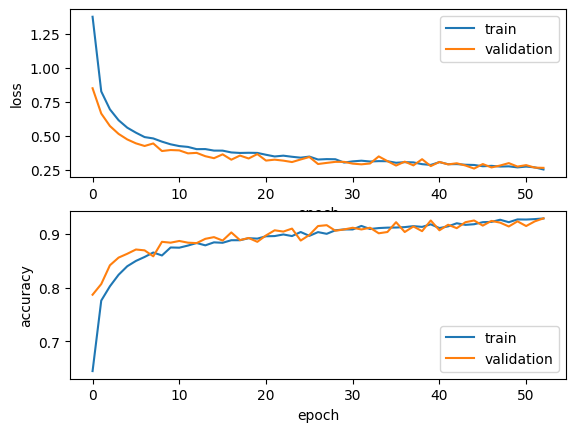

In [ ]:
def plot_history(history):
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    return;

plot_history(history)

In [ ]:
loss, accuracy = model_2.evaluate(X_test_df_selected, y_test_df_encoded)

# Print the evaluation results
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

61/61 [==============================] - 0s 3ms/step - loss: 0.6233 - accuracy: 0.8351
Validation Loss: 0.6233168840408325
Validation Accuracy: 0.8350569009780884


61/61 [==============================] - 1s 10ms/step


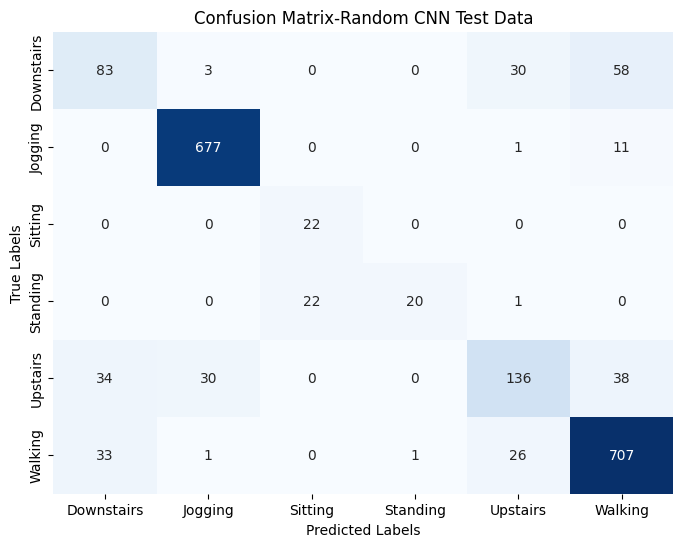

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred_cnn2 = np.argmax(model_2.predict(X_test_df_selected), axis=1)
# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_df_encoded, y_pred_cnn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix-Random CNN Test Data")
plt.show()

In [ ]:
# Predict on the test data using the Keras model
y_pred_keras = np.argmax(model_2.predict(X_test_df_scaled), axis=1)

61/61 [==============================] - 0s 3ms/step


In [ ]:
predictions2 = model_2.predict(X_kaggle_selected)
predicted_labels_encoded = np.argmax(predictions2, axis=1)
predicted_labels_2 = label_encoder.inverse_transform(predicted_labels_encoded)

# Print the predicted class labels
print(predicted_labels_2)

79/79 [==============================] - 1s 7ms/step
['Upstairs' 'Sitting' 'Downstairs' ... 'Jogging' 'Walking' 'Downstairs']


In [ ]:
# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX8.csv' #zainab
# Save predictions for the Kaggle data to a CSV file
df_kaggle['prediction'] = predicted_labels_2
df_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX8.csv


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier()

# Train the classifier on the training data
gbm_classifier.fit(X_train_selected, y_train_encoded)


GradientBoostingClassifier()

In [ ]:

# Predict on the Validation data
y_pred_gbm = gbm_classifier.predict(X_test_selected)

# Evaluate the accuracy of the classifier
accuracy_gbm = accuracy_score(y_test_encoded, y_pred_gbm)
print("Accuracy (GBM):", accuracy_gbm)

Accuracy (GBM): 0.93026941362916


In [ ]:
# Predict on the test data
y_pred_gbm_test = gbm_classifier.predict(X_test_df_selected)

# Evaluate the accuracy of the classifier
accuracy_gbm = accuracy_score(y_test_df_encoded, y_pred_gbm_test)
print("Accuracy (GBM):", accuracy_gbm)

Accuracy (GBM): 0.8516028955532575


In [ ]:
predictions_updated_gbm = gbm_classifier.predict(X_kaggle_selected)
predicted_labels_encoded = label_encoder.inverse_transform(predictions_updated_gbm)

predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX10.csv'
# Save predictions for the Kaggle data to a CSV file
df_kaggle['prediction'] = predicted_labels_encoded
df_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX10.csv


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100],
    'learning_rate': [ 0.01, 0.8],
    'max_depth': [5, 8]
}

In [ ]:
# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=42)
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
# Perform grid search on the training data
grid_search.fit(X_train_selected, y_train_encoded)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.8], 'max_depth': [5, 8],
                         'n_estimators': [100]},
             scoring='accuracy')

In [ ]:
# Get the best estimator from the grid search
best_gbm = grid_search.best_estimator_

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test data
y_pred_test_gbm = best_gbm.predict(X_test_selected)
accuracy_test_gbm = accuracy_score(y_test_encoded, y_pred_test_gbm)
print("Accuracy on test data (GBM):", accuracy_test_gbm)

Best hyperparameters: {'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 100}
Accuracy on test data (GBM): 0.9580031695721077


In [ ]:
# Predict on the test set
y_pred_va = best_gbm.predict(X_test_df_selected)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test_df_encoded, y_pred_va)
print("Accuracy:", accuracy)

Accuracy: 0.8397104446742503


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
gbm_pred = gbm_classifier.predict_proba(X_test_selected)
rf_pred = best_rf_classifier.predict_proba(X_test_selected)
cnn_pred = model.predict(X_test_selected)

40/40 [==============================] - 0s 2ms/step


In [ ]:
# Combine predictions for soft voting
ensemble_pred = (gbm_pred + rf_pred + cnn_pred) / 3

# Get the predicted class with the highest probability
ensemble_pred_class = np.argmax(ensemble_pred, axis=1)

In [ ]:
# Evaluate the accuracy of the ensemble classifier
accuracy_ensemble = accuracy_score(y_test_encoded, ensemble_pred_class)
print("Accuracy (Ensemble):", accuracy_ensemble)


Accuracy (Ensemble): 0.9516640253565769


In [ ]:
gbm_pred_t = gbm_classifier.predict_proba(X_test_df_selected)
rf_pred_t = best_rf_classifier.predict_proba(X_test_df_selected)
cnn_pred_t = model.predict(X_test_df_selected)

# Combine predictions for soft voting
ensemble_pred_test = (gbm_pred_t + rf_pred_t + cnn_pred_t) / 3

# Get the predicted class with the highest probability
ensemble_pred_class = np.argmax(ensemble_pred_test, axis=1)
 #Evaluate the accuracy of the ensemble classifier
accuracy_ensemble = accuracy_score(y_test_df_encoded, ensemble_pred_class)
print("Accuracy (Ensemble):", accuracy_ensemble)

61/61 [==============================] - 0s 2ms/step
Accuracy (Ensemble): 0.8650465356773527


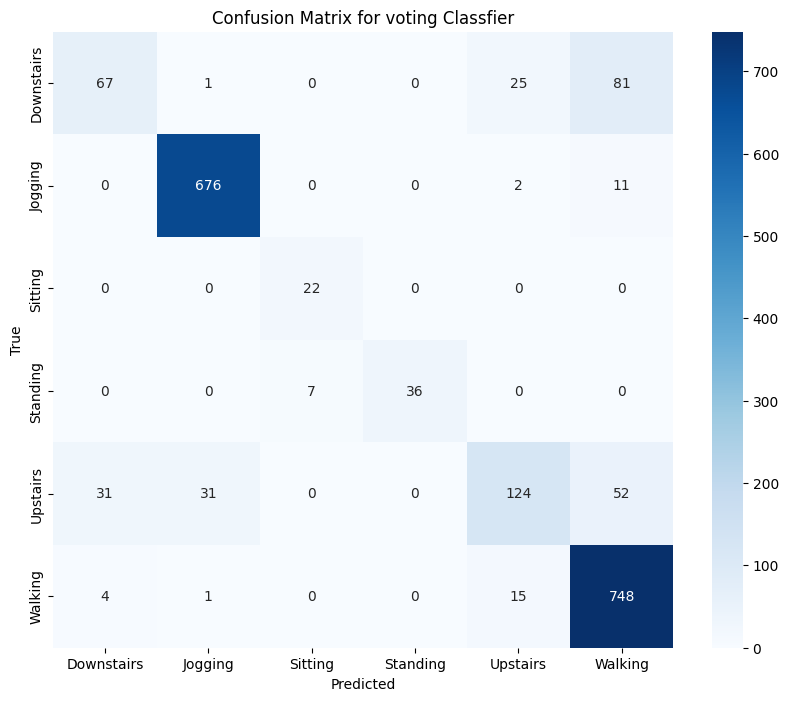

In [ ]:
from sklearn.metrics import roc_curve, auc
labels = sorted(y_test_df.unique())
# Compute confusion matrix
cm = confusion_matrix(y_test_df_encoded, ensemble_pred_class)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for voting Classfier')
plt.show()

In [ ]:
gbm_pred_kaggle = gbm_classifier.predict_proba(X_kaggle_selected)
rf_pred_kaggle = best_rf_classifier.predict_proba(X_kaggle_selected)
cnn_pred_kaggle = model.predict(X_kaggle_selected)

79/79 [==============================] - 0s 2ms/step


In [ ]:
# Combine predictions for soft voting
ensemble_pred_kaggle = (gbm_pred_kaggle + rf_pred_kaggle + cnn_pred_kaggle) / 3

In [ ]:
# Get the predicted class with the highest probability
ensemble_pred_class_kaggle = np.argmax(ensemble_pred_kaggle, axis=1)

ensemble_pred_class_kaggle = label_encoder.inverse_transform(ensemble_pred_class_kaggle)



In [ ]:
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX11.csv'
# Save predictions for the Kaggle data to a CSV file
df_kaggle['prediction'] = ensemble_pred_class_kaggle
df_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX11.csv


In [ ]:
import numpy as np
X_train_selected, y_train_encoded
# Reshape the training data
X_train_scaled_reshaped = np.reshape(X_train_selected, (X_train_selected.shape[0], 1, X_train_selected.shape[1]))

# Reshape the testing data
X_test_scaled_reshaped = np.reshape(X_test_selected, (X_test_selected.shape[0], 1, X_test_selected.shape[1]))
X_test_scaled_reshaped = np.reshape(X_test_selected, (X_test_selected.shape[0], 1, X_test_selected.shape[1]))
#y_test_reshaped = np.reshape(y_test_encoded, (y_test_encoded.shape[0], 1, y_test_encoded.shape[1]))

# Reshape the unseen data (X_test_df_scaled and X_kaggle_scaled)
X_test_df_scaled_reshaped = np.reshape(X_test_df_selected, (X_test_df_selected.shape[0], 1, X_test_df_selected.shape[1]))
#y_test_reshaped = np.reshape(y_test_df_encoded, (y_test_df_encoded.shape[0], 1, y_test_df_encoded.shape[1]))
X_kaggle_scaled_reshaped = np.reshape(X_kaggle_selected, (X_kaggle_selected.shape[0], 1, X_kaggle_selected.shape[1]))


In [ ]:
X_train_scaled_reshaped.shape


(5048, 1, 39)

In [ ]:
X_test_scaled_reshaped.shpe

(1934, 1, 39)

In [ ]:
y_test_encoded.shape

(1262,)

In [ ]:
y_test_encoded = y_test_encoded[:X_test_scaled_reshaped.shape[0]]

In [ ]:
print("Shapes:")
print("X_train_scaled_reshaped:", X_train_scaled_reshaped.shape)
print("y_train_encoded:", y_train_encoded.shape)
print("X_test_scaled_reshaped:", X_test_scaled_reshaped.shape)
print("y_test_encoded:", y_test_encoded.shape)

Shapes:
X_train_scaled_reshaped: (5048, 1, 39)
y_train_encoded: (5048,)
X_test_scaled_reshaped: (1934, 1, 39)
y_test_encoded: (1262,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the number of features
num_features = X_train_scaled_reshaped.shape[2]  # Number of features in your dataset
# Create the model
model = Sequential()
model.add(LSTM(units=15, input_shape=(X_train_scaled_reshaped.shape[1], num_features), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=15))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 1, 15)             3300      
                                                                 
 dropout_32 (Dropout)        (None, 1, 15)             0         
                                                                 
 lstm_26 (LSTM)              (None, 15)                1860      
                                                                 
 dropout_33 (Dropout)        (None, 15)                0         
                                                                 
 dense_27 (Dense)            (None, 6)                 96        
                                                                 
Total params: 5256 (20.53 KB)
Trainable params: 5256 (20.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_lstm = model.fit(X_train_scaled_reshaped, y_train_encoded, epochs=80, batch_size=32, validation_data=(X_test_scaled_reshaped, y_test_encoded))

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_scaled_reshaped, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/80
158/158 [==============================] - 7s 14ms/step - loss: 1.5712 - accuracy: 0.5679 - val_loss: 1.2119 - val_accuracy: 0.6521
Epoch 2/80
158/158 [==============================] - 1s 6ms/step - loss: 1.0555 - accuracy: 0.6858 - val_loss: 0.8405 - val_accuracy: 0.7433
Epoch 3/80
158/158 [==============================] - 1s 7ms/step - loss: 0.8753 - accuracy: 0.7189 - val_loss: 0.7270 - val_accuracy: 0.7694
Epoch 4/80
158/158 [==============================] - 1s 7ms/step - loss: 0.7833 - accuracy: 0.7373 - val_loss: 0.6649 - val_accuracy: 0.7750
Epoch 5/80
158/158 [==============================] - 1s 7ms/step - loss: 0.7406 - accuracy: 0.7403 - val_loss: 0.6171 - val_accuracy: 0.7916
Epoch 6/80
158/158 [==============================] - 1s 6ms/step - loss: 0.7021 - accuracy: 0.7569 - val_loss: 0.5839 - val_accuracy: 0.7971
Epoch 7/80
158/158 [==============================] - 1s 7ms/step - loss: 0.6686 - accuracy: 0.7597 - val_loss: 0.5554 - val_accuracy: 0.8059
Epoch

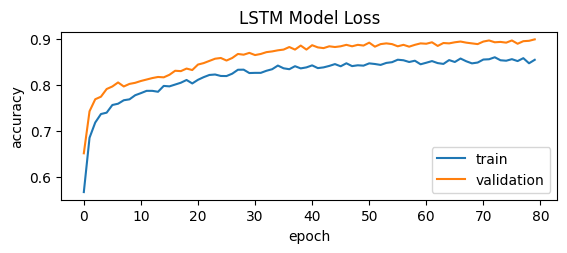

In [ ]:
# Plot training history

def plot_history(history_lstm):
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history_lstm.history['loss'])
    plt.plot(history_lstm.history['val_loss'])

    plt.title(' LSTM Model Accuracy')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])


    plt.subplot(2,1,2)
    plt.plot(history_lstm.history['accuracy'])
    plt.plot(history_lstm.history['val_accuracy'])

    plt.title('LSTM Model Loss')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])

    return;

plot_history(history_lstm)

In [ ]:
# Make predictions on X_test_df_scaled
y_test_df_pred= model.predict(X_test_df_scaled_reshaped)
# Calculate accuracy on X_test_df_scaled
y_test_df_pred_labels = np.argmax(y_test_df_pred, axis=1)

# Calculate accuracy on X_test_df_scaled
accuracy_test_df = accuracy_score(y_test_df_encoded, y_test_df_pred_labels)
print("Accuracy on X_test_df_scaled:", accuracy_test_df)

61/61 [==============================] - 1s 3ms/step
Accuracy on X_test_df_scaled: 0.8138572905894519


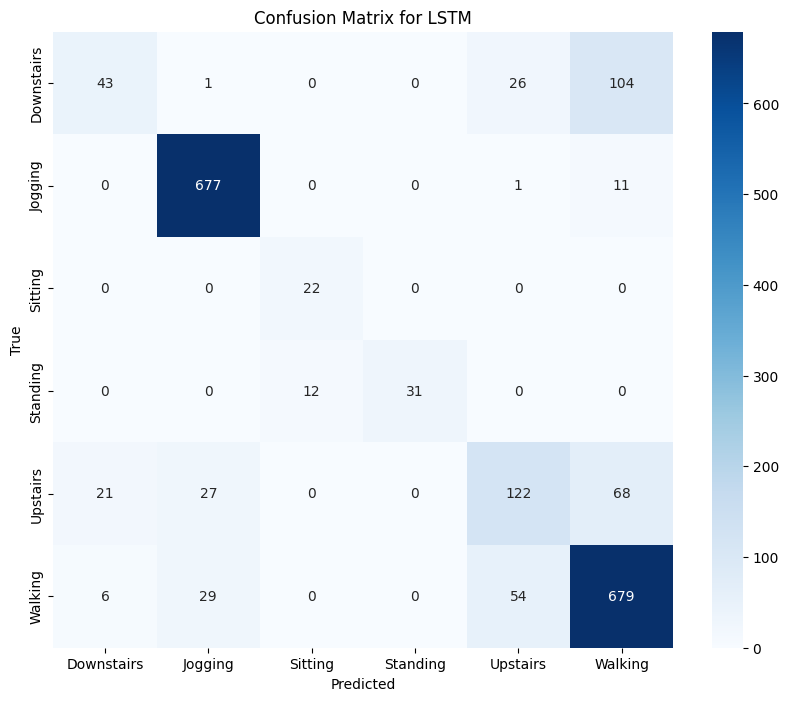

In [ ]:
# Compute confusion matrix
# Convert probabilities to class labels
y_test_df_pred_labels = np.argmax(y_test_df_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_df_encoded, y_test_df_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for LSTM')
plt.show()


In [ ]:
 #Make predictions on X_test_df_scaled
Kaggle_df_pred_prob = model.predict(X_kaggle_scaled_reshaped)
Kaggle_df_pred = np.argmax(Kaggle_df_pred_prob, axis=1)
pred_class_kaggle = label_encoder.inverse_transform(Kaggle_df_pred)

predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX22.csv'
# Save predictions for the Kaggle data to a CSV file
df_kaggle['prediction'] = pred_class_kaggle
df_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

79/79 [==============================] - 1s 6ms/step
Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX22.csv


In [ ]:
num_features

59

In [ ]:
from keras.layers import SimpleRNN

# Create the model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=70, input_shape=(X_train_scaled_reshaped.shape[1], num_features), return_sequences=True))
model_rnn.add(Dropout(0.5))
model_rnn.add(SimpleRNN(units=60))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model_rnn.summary()


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_26 (SimpleRNN)   (None, 1, 70)             7700      
                                                                 
 dropout_58 (Dropout)        (None, 1, 70)             0         
                                                                 
 simple_rnn_27 (SimpleRNN)   (None, 60)                7860      
                                                                 
 dropout_59 (Dropout)        (None, 60)                0         
                                                                 
 dense_40 (Dense)            (None, 6)                 366       
                                                                 
Total params: 15926 (62.21 KB)
Trainable params: 15926 (62.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_rnn = model_rnn.fit(X_train_scaled_reshaped, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_test_scaled_reshaped, y_test_encoded))

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_scaled_reshaped, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/100
158/158 [==============================] - 4s 8ms/step - loss: 1.1090 - accuracy: 0.6084 - val_loss: 0.6676 - val_accuracy: 0.7916
Epoch 2/100
158/158 [==============================] - 1s 5ms/step - loss: 0.7180 - accuracy: 0.7559 - val_loss: 0.5523 - val_accuracy: 0.8185
Epoch 3/100
158/158 [==============================] - 1s 5ms/step - loss: 0.6272 - accuracy: 0.7851 - val_loss: 0.5033 - val_accuracy: 0.8233
Epoch 4/100
158/158 [==============================] - 1s 6ms/step - loss: 0.5619 - accuracy: 0.8055 - val_loss: 0.4718 - val_accuracy: 0.8233
Epoch 5/100
158/158 [==============================] - 1s 5ms/step - loss: 0.5276 - accuracy: 0.8164 - val_loss: 0.4587 - val_accuracy: 0.8320
Epoch 6/100
158/158 [==============================] - 1s 8ms/step - loss: 0.5030 - accuracy: 0.8253 - val_loss: 0.4281 - val_accuracy: 0.8479
Epoch 7/100
158/158 [==============================] - 1s 8ms/step - loss: 0.4904 - accuracy: 0.8288 - val_loss: 0.4232 - val_accuracy: 0.8455

In [ ]:
# Make predictions on X_test_df_scaled
y_test_df_pred_r= model_rnn.predict(X_test_df_scaled_reshaped)
# Calculate accuracy on X_test_df_scaled
y_test_df_pred_labels_r = np.argmax(y_test_df_pred_r, axis=1)

# Calculate accuracy on X_test_df_scaled
accuracy_test_df = accuracy_score(y_test_df_encoded, y_test_df_pred_labels_r)
print("Accuracy on X_test_df_scaled:", accuracy_test_df)

61/61 [==============================] - 0s 2ms/step
Accuracy on X_test_df_scaled: 0.8309203722854188


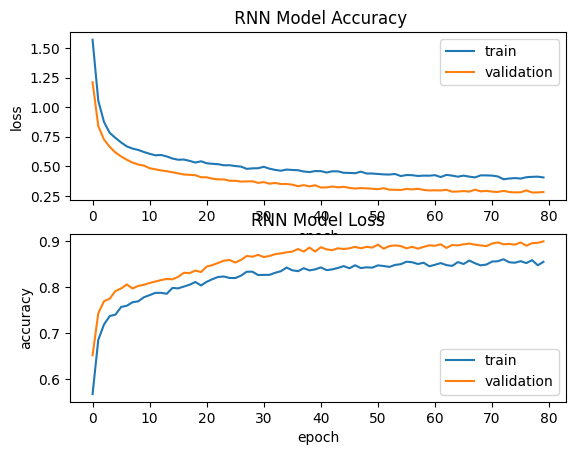

In [ ]:
def plot_history(history_rnn):
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history_rnn.history['loss'])
    plt.plot(history_rnn.history['val_loss'])

    plt.title(' RNN Model Accuracy')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])


    plt.subplot(2,1,2)
    plt.plot(history_rnn.history['accuracy'])
    plt.plot(history_rnn.history['val_accuracy'])

    plt.title('RNN Model Loss')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])

    return;

plot_history(history_lstm)

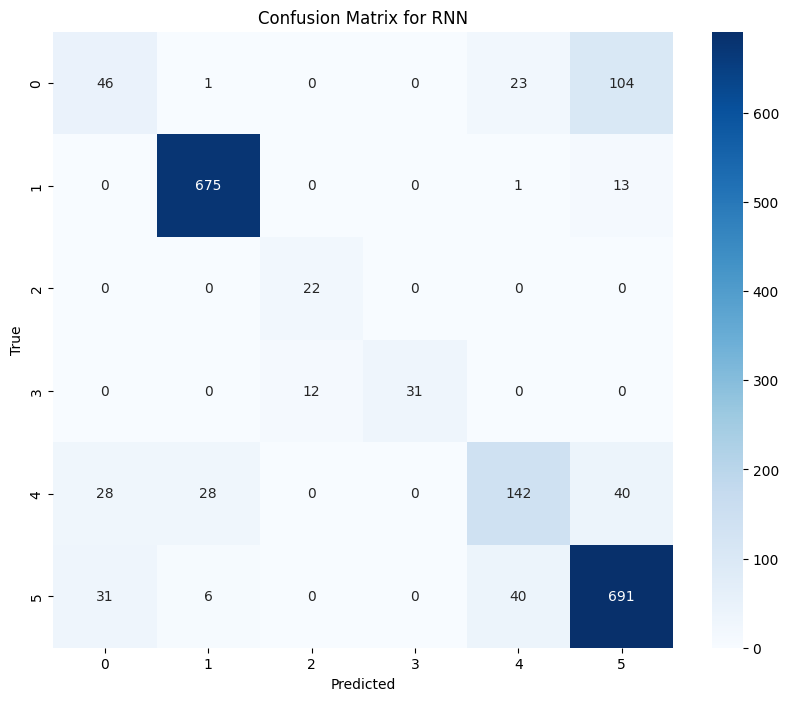

In [ ]:
# Convert probabilities to class labels
y_test_df_pred_labels = np.argmax(y_test_df_pred_r, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_df_encoded, y_test_df_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for RNN')
plt.show()


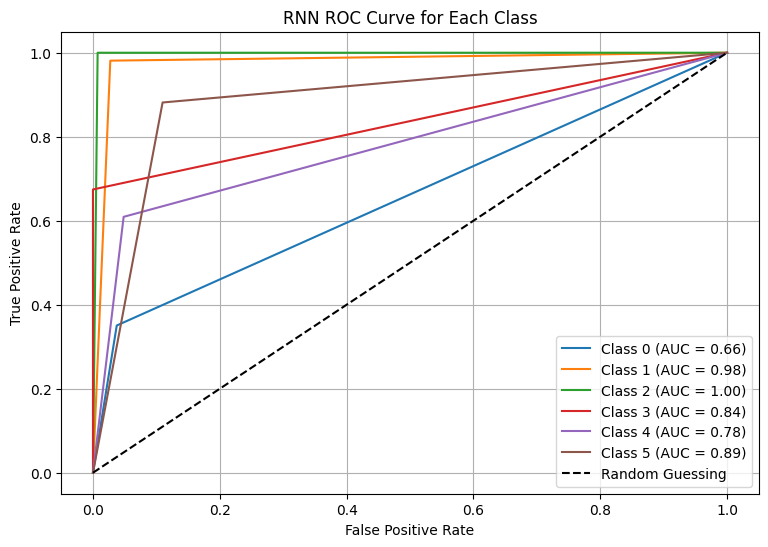

In [ ]:
labels = np.unique(np.argmax(y_test_df_pred_r, axis=1))

plt.figure(figsize=(9, 6))
for label in labels:
    fpr, tpr, _ = roc_curve(y_test_df_encoded== label, y_test_df_pred_labels == label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RNN ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
 #Make predictions on X_test_df_scaled
Kaggle_df_pred_prob = model_rnn.predict(X_kaggle_scaled_reshaped)
Kaggle_df_pred_r = np.argmax(Kaggle_df_pred_prob, axis=1)
pred_class_kaggle_r = label_encoder.inverse_transform(Kaggle_df_pred_r)

predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX25.csv'
# Save predictions for the Kaggle data to a CSV file
df_kaggle['prediction'] = pred_class_kaggle_r
df_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

79/79 [==============================] - 0s 4ms/step
Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/SANDBOX25.csv
